### DEMQUA08
# Illustrates integration using Simpson's rule

In [1]:
from numpy import poly1d,polyfit, linspace, array
from compecon import qnwsimp, demo
import matplotlib.pyplot as plt

In [2]:
n = 1001
xmin, xmax = -1, 1
xwid = xmax-xmin
x = linspace(xmin, xmax, n)

In [3]:
f = poly1d([2.0, -1.0, 0.5, 5.0])

In [4]:
def fitquad(xi):
    newcoef = polyfit(xi, f(xi), 2)
    return poly1d(newcoef)

In [5]:
def plot_simp(n):
    xi, wi = qnwsimp(n+1, xmin, xmax)
    
    fig = plt.figure()
    plt.plot(x, f(x), linewidth=3, label=r'$f(x)$')
    
    for k in range(n//2):
        xii = xi[(2*k):(2*k+3)]
        xiii = linspace(xii[0], xii[2], 125)
        p = fitquad(xii)
        plt.fill_between(xiii, p(xiii), color='yellow')    
        if k==0:
            plt.plot(xiii, p(xiii),'r--', label=r'$\tilde{f}_{%d}(x)$' % (n+1))
        else:
            plt.plot(xiii, p(xiii),'r--')
    
    plt.vlines(xi, 0, f(xi),'k', linestyle=':')
    plt.hlines(0,xmin-0.1, xmax+0.1,'k',linewidth=2)
    plt.xlim(xmin-0.1, xmax+0.1)
    xtl = ['$x_{%d}$' % i for i in range(n+1)]
    xtl[0] += '=a'
    xtl[n] += '=b'
    plt.xticks(xi, xtl)
    plt.yticks([0],['0'])
    plt.legend()
    return fig

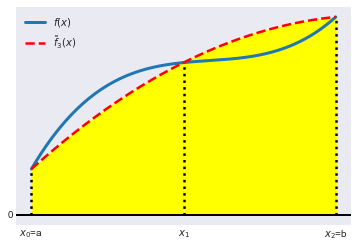

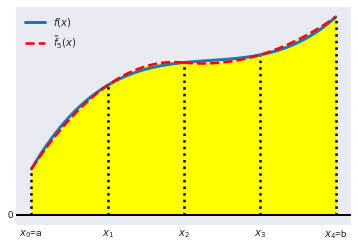

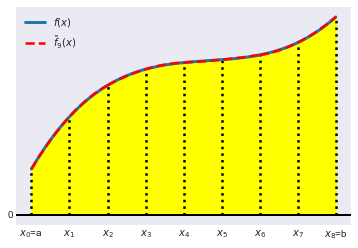

In [6]:
figs = [plot_simp(n) for n in [2, 4, 8]]